#**Thesis Project**


---




# **1. Installing Dependencies**

# 1.1 Import Required Libraries


In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.1 MB/s eta 0:00:00


In [ ]:
!pip install scikit-learn # install scikit-learn if you haven't already

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



# Encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize

# Scaling
from sklearn.preprocessing import StandardScaler

# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Machine learning model
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis ,QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression

# Performence
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, mean_absolute_error, f1_score, confusion_matrix, roc_auc_score, roc_curve


# Remove warnings
import warnings
warnings.filterwarnings('ignore')


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


# 1.2 Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **2. Dataset**

# 2.1 Exploring  Dataset

In [ ]:
#Reading the data from the dataset
data = pd.read_csv("/content/drive/MyDrive/Thesis Project/studentPerformance.csv")

In [ ]:
#Explore the first 5 rows of the data
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


# 2.2 Dataset Distribution

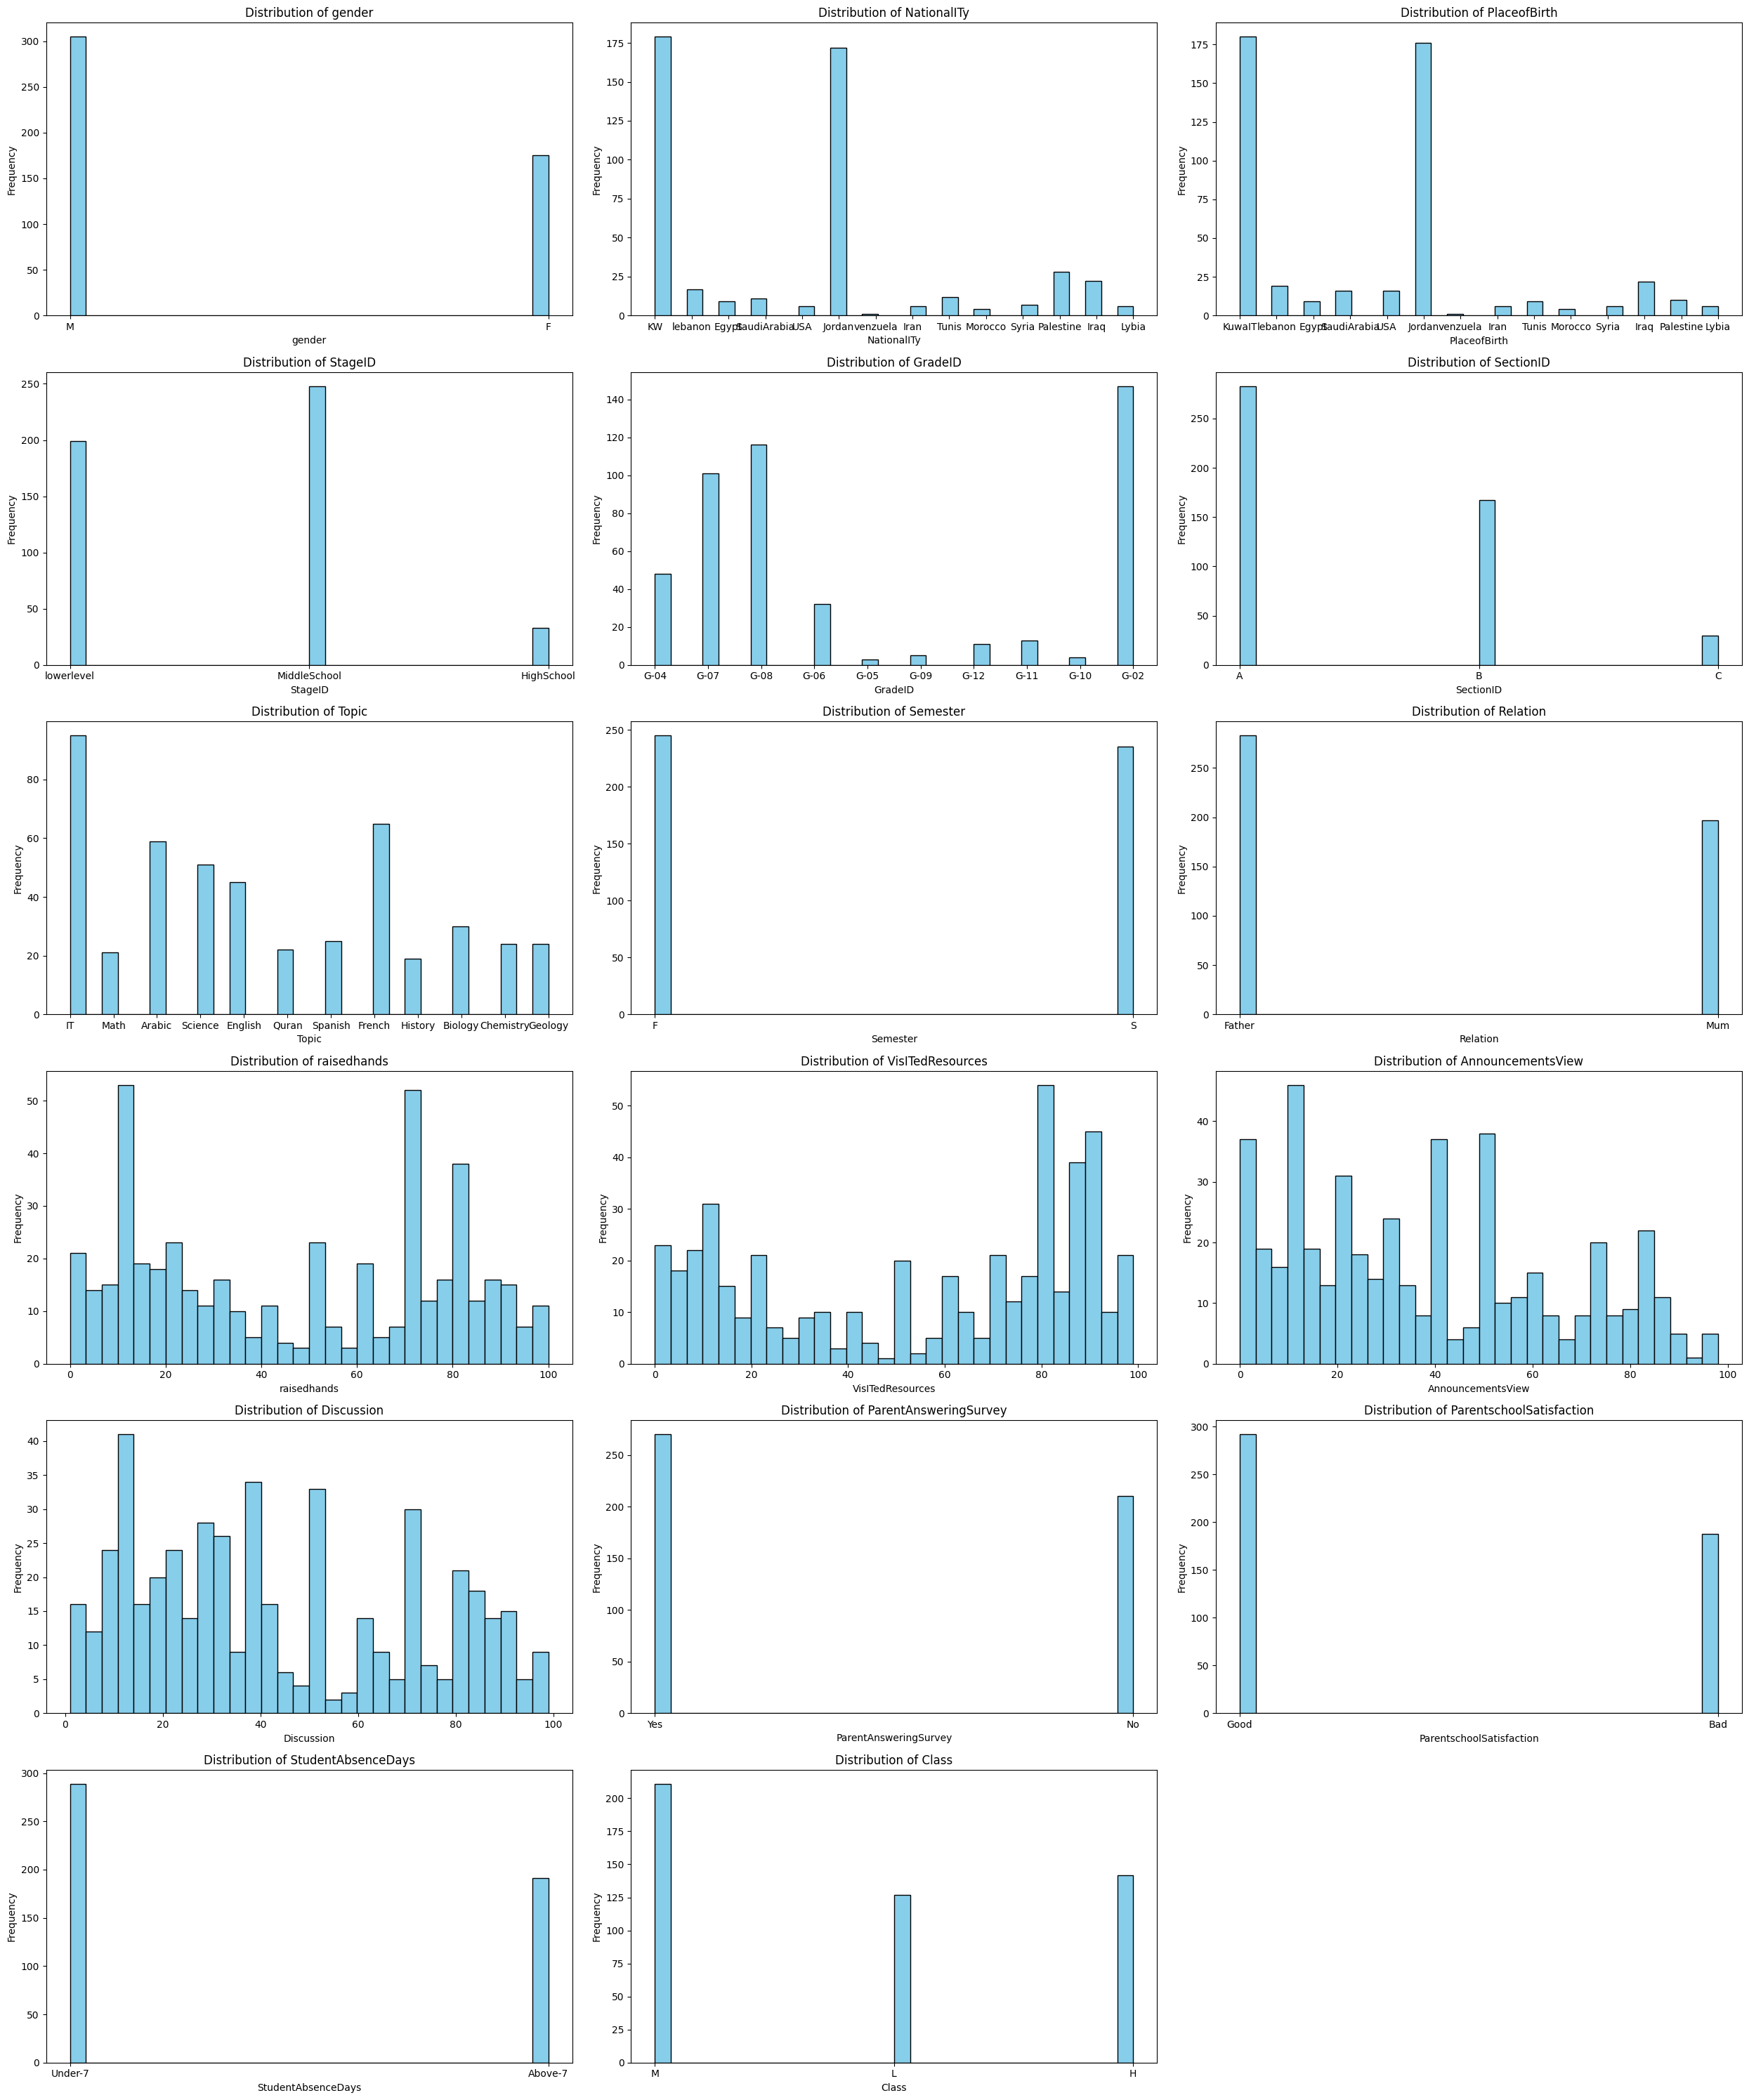

In [ ]:

# Get the number of attributes (columns)
num_attributes = len(data.columns)

# Determine the grid size for subplots (rows and columns)
ncols = 3  # You can adjust this based on the number of columns you want per row
nrows = (num_attributes + ncols - 1) // ncols  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(25, 5 * nrows))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Loop through each attribute and create a histogram
for i, col in enumerate(data.columns):
    axes[i].hist(data[col], bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()



## 2.1.1 Dataset information




In [ ]:
#show the summary information about the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [ ]:
#show the descriptive statistics of numerical columns in the dataframe
data.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [ ]:
#show the dimension of the dataframe
data.shape

(480, 17)

# **3. Data Analysis**

## 3.1. Dataset features

### 3.1.1 Categorical features

In [ ]:
#print categorical data columns
data.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

,0
gender,2
NationalITy,14
PlaceofBirth,14
StageID,3
GradeID,10
SectionID,3
Topic,12
Semester,2
Relation,2
ParentAnsweringSurvey,2


In [ ]:
# create a new data frame that stores categorical  data from the dataset
categorical_F = data.select_dtypes(object)

In [ ]:
# print categorical dataframe columns
categorical_F.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey',
       'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class'],
      dtype='object')

In [ ]:
# explore the categorical data
categorical_F.describe()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
count,480,480,480,480,480,480,480,480,480,480,480,480,480
unique,2,14,14,3,10,3,12,2,2,2,2,2,3
top,M,KW,KuwaIT,MiddleSchool,G-02,A,IT,F,Father,Yes,Good,Under-7,M
freq,305,179,180,248,147,283,95,245,283,270,292,289,211


#### 3.1.1.1 Target

In [ ]:
#print the count of each class
categorical_F["Class"].value_counts()

,count
Class,
M,211
H,142
L,127


#### 3.1.1.2 Gender Feature

In [ ]:
categorical_F["gender"].value_counts()

,count
gender,
M,305
F,175


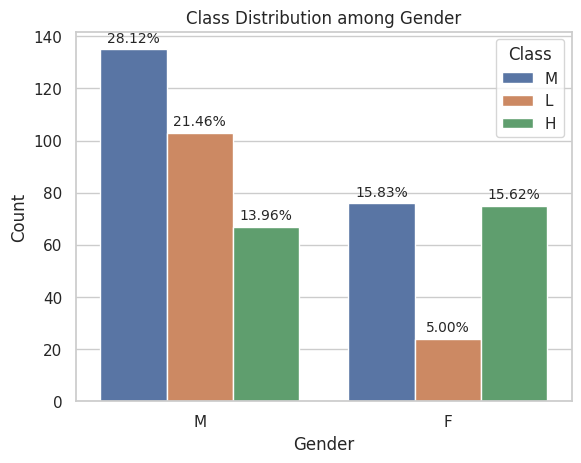

In [ ]:
# Create the countplot
sns.set(style="whitegrid")  # Set the style to whitegrid
count_plot = sns.countplot(x=data["gender"], hue="Class", data=data)  # Plot gender against Class
sizes = []  # Initialize a list to store bar heights

# Add percentage labels to each bar
for patch in count_plot.patches:
    height = patch.get_height()  # Get the height of the current bar
    if height > 0:  # Check if the height is greater than 0
        sizes.append(height)  # Add the height to the list

        # Add text label above the bar showing the percentage
        count_plot.annotate('{:.2f}%'.format(height / len(data) * 100),
                            xy=(patch.get_x() + patch.get_width() / 2., height),
                            xytext=(0, 3),  # 3 points vertical offset
                            textcoords="offset points",
                            ha='center', va='bottom', fontsize=10)

plt.title('Class Distribution among Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Class')
# Show the plot
plt.show()

#### 3.1.1.3 Nationality Feature

In [ ]:
categorical_F["NationalITy"].value_counts()

,count
NationalITy,
KW,179
Jordan,172
Palestine,28
Iraq,22
lebanon,17
Tunis,12
SaudiArabia,11
Egypt,9
Syria,7


<Axes: title={'center': 'Class Distribution among Nationality'}, xlabel='Count', ylabel='Nationality'>

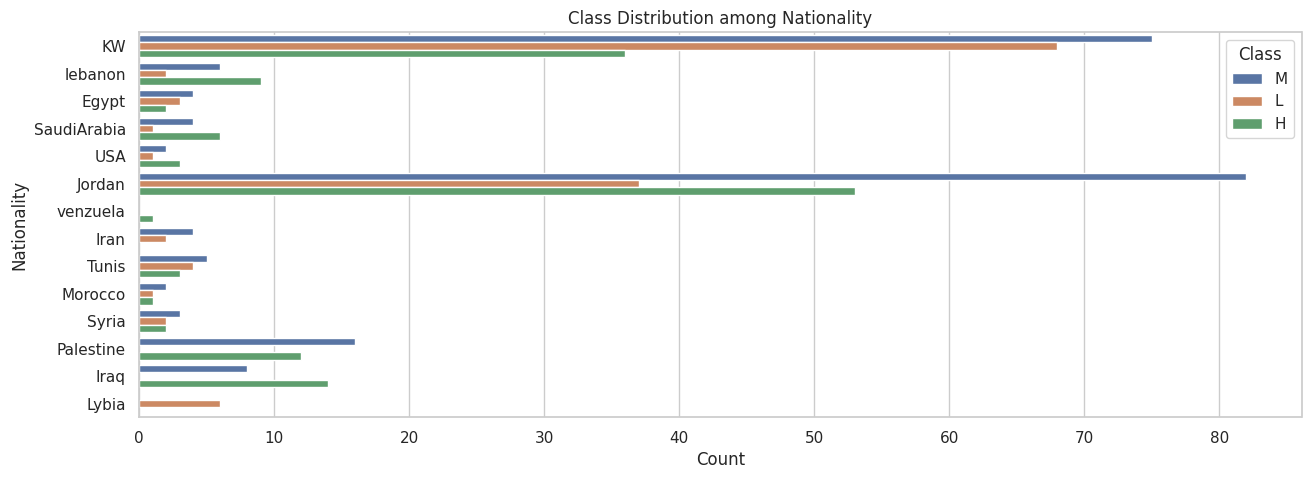

In [ ]:
# Set the figure size
plt.figure(figsize=(15, 5))


plt.title('Class Distribution among Nationality')
plt.xlabel('Count')
plt.ylabel('Nationality')
plt.legend(title='Class')
# Show the plot

sns.countplot(y=data["NationalITy"], hue="Class", data=data)


#### 3.1.1.4  Educational Stage Features

In [ ]:
categorical_F["StageID"].value_counts()

,count
StageID,
MiddleSchool,248
lowerlevel,199
HighSchool,33


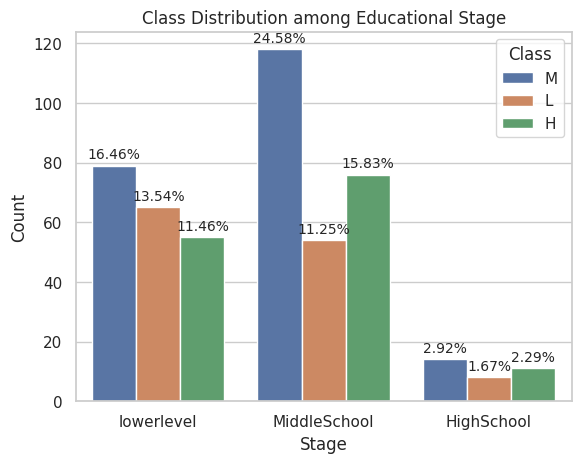

In [ ]:
#sns.countplot(y=data["StageID"], hue="Class", data=data)


# Create the countplot
sns.set(style="whitegrid")  # Set the style to whitegrid
count_plot = sns.countplot(x=data["StageID"], hue="Class", data=data)  # Plot gender against Class
sizes = []  # Initialize a list to store bar heights

# Add percentage labels to each bar
for patch in count_plot.patches:
    height = patch.get_height()  # Get the height of the current bar
    if height > 0:  # Check if the height is greater than 0
        sizes.append(height)  # Add the height to the list

        # Add text label above the bar showing the percentage
        count_plot.annotate('{:.2f}%'.format(height / len(data) * 100),
                            xy=(patch.get_x() + patch.get_width() / 2., height),
                            xytext=(0, 3),  # 3 points vertical offset
                            textcoords="offset points",
                            ha='center', va='bottom', fontsize=10)

plt.title('Class Distribution among Educational Stage')
plt.xlabel('Stage')
plt.ylabel('Count')
plt.legend(title='Class')
# Show the plot
plt.show()

#### 3.1.1.5 GradeID Feature



In [ ]:
categorical_F["GradeID"].value_counts()

,count
GradeID,
G-02,147
G-08,116
G-07,101
G-04,48
G-06,32
G-11,13
G-12,11
G-09,5
G-10,4


<Axes: title={'center': 'Class Distribution among Grades'}, xlabel='Count', ylabel='Grade ID'>

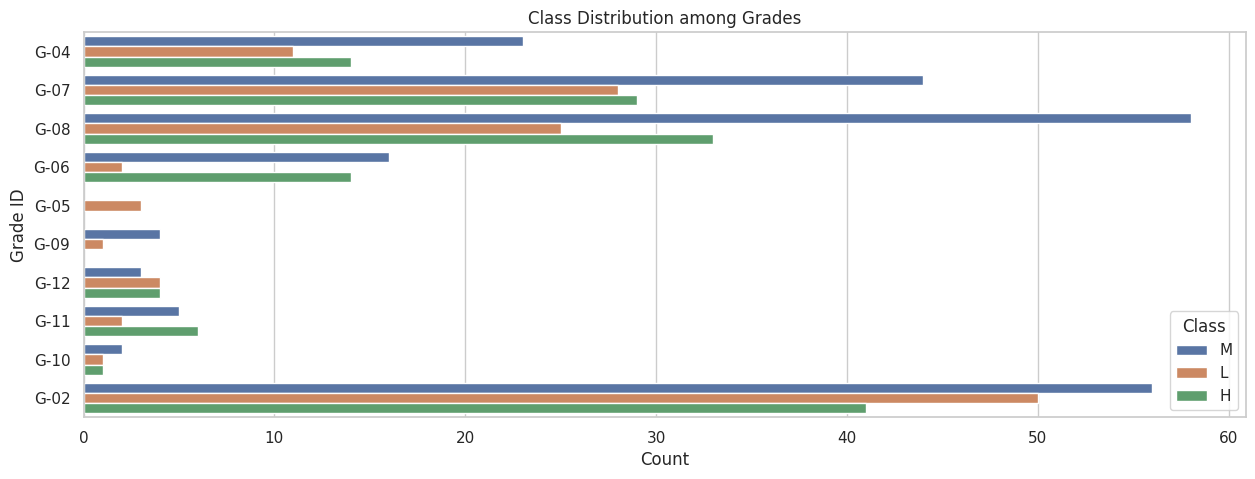

In [ ]:
plt.figure(figsize=(15,5))
plt.title('Class Distribution among Grades')
plt.xlabel('Count')
plt.ylabel('Grade ID')
plt.legend(title='Class')
# Show the plot


sns.countplot(y=data["GradeID"], hue="Class", data=data)

#### 3.1.1.6 Responsible Parent


In [ ]:
categorical_F["Relation"].value_counts()

,count
Relation,
Father,283
Mum,197


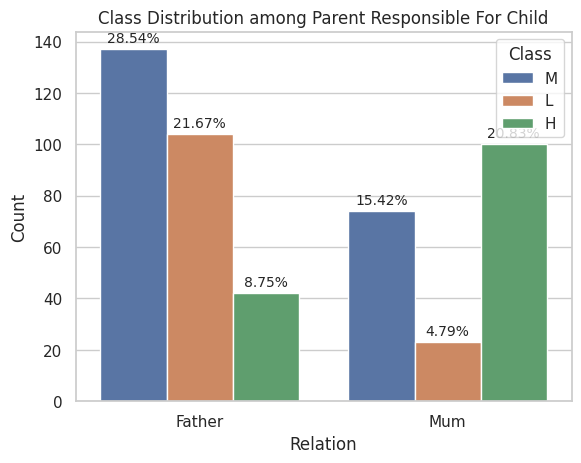

In [ ]:

# Create the countplot
sns.set(style="whitegrid")  # Set the style to whitegrid
count_plot = sns.countplot(x=data["Relation"], hue="Class", data=data)  # Plot gender against Class
sizes = []  # Initialize a list to store bar heights

# Add percentage labels to each bar
for patch in count_plot.patches:
    height = patch.get_height()  # Get the height of the current bar
    if height > 0:  # Check if the height is greater than 0
        sizes.append(height)  # Add the height to the list

        # Add text label above the bar showing the percentage
        count_plot.annotate('{:.2f}%'.format(height / len(data) * 100),
                            xy=(patch.get_x() + patch.get_width() / 2., height),
                            xytext=(0, 3),  # 3 points vertical offset
                            textcoords="offset points",
                            ha='center', va='bottom', fontsize=10)

plt.title('Class Distribution among Parent Responsible For Child')
plt.xlabel('Relation')
plt.ylabel('Count')
plt.legend(title='Class')
# Show the plot
plt.show()

#### 3.1.1.7 Parents Satasfaction


In [ ]:
categorical_F["ParentschoolSatisfaction"].value_counts()

,count
ParentschoolSatisfaction,
Good,292
Bad,188


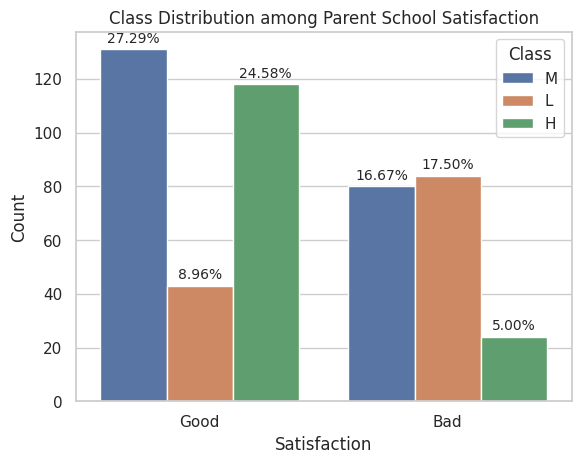

In [ ]:
# Create the countplot
sns.set(style="whitegrid")  # Set the style to whitegrid
count_plot = sns.countplot(x=data["ParentschoolSatisfaction"], hue="Class", data=data)  # Plot gender against Class
sizes = []  # Initialize a list to store bar heights

# Add percentage labels to each bar
for patch in count_plot.patches:
    height = patch.get_height()  # Get the height of the current bar
    if height > 0:  # Check if the height is greater than 0
        sizes.append(height)  # Add the height to the list

        # Add text label above the bar showing the percentage
        count_plot.annotate('{:.2f}%'.format(height / len(data) * 100),
                            xy=(patch.get_x() + patch.get_width() / 2., height),
                            xytext=(0, 3),  # 3 points vertical offset
                            textcoords="offset points",
                            ha='center', va='bottom', fontsize=10)

plt.title('Class Distribution among Parent School Satisfaction')
plt.xlabel('Satisfaction')
plt.ylabel('Count')
plt.legend(title='Class')
# Show the plot
plt.show()

#### 3.1.1.8 Parents Answering Surveys




In [ ]:
categorical_F["ParentAnsweringSurvey"].value_counts()

,count
ParentAnsweringSurvey,
Yes,270
No,210


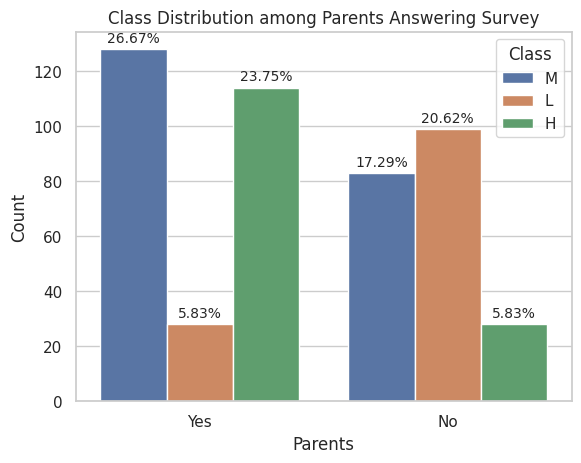

In [ ]:
# Create the countplot
sns.set(style="whitegrid")  # Set the style to whitegrid
count_plot = sns.countplot(x=data["ParentAnsweringSurvey"], hue="Class", data=data)  # Plot gender against Class
sizes = []  # Initialize a list to store bar heights

# Add percentage labels to each bar
for patch in count_plot.patches:
    height = patch.get_height()  # Get the height of the current bar
    if height > 0:  # Check if the height is greater than 0
        sizes.append(height)  # Add the height to the list

        # Add text label above the bar showing the percentage
        count_plot.annotate('{:.2f}%'.format(height / len(data) * 100),
                            xy=(patch.get_x() + patch.get_width() / 2., height),
                            xytext=(0, 3),  # 3 points vertical offset
                            textcoords="offset points",
                            ha='center', va='bottom', fontsize=10)

plt.title('Class Distribution among Parents Answering Survey')
plt.xlabel('Parents')
plt.ylabel('Count')
plt.legend(title='Class')
# Show the plot
plt.show()

#### 3.1.1.9 Correlation of Behavioural Features


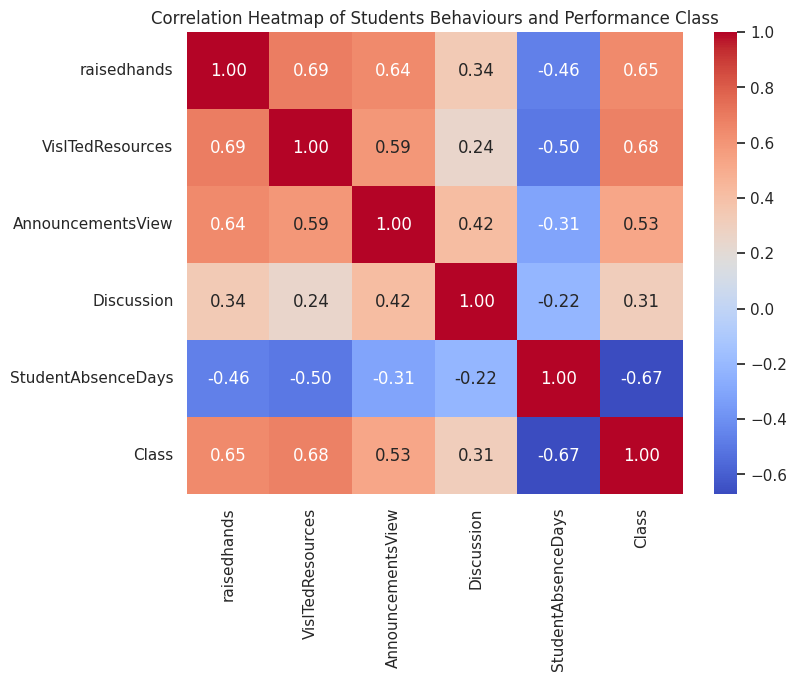

In [ ]:
# Select the specific attributes
selected_attributes = ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion', 'StudentAbsenceDays']

# Create the correlation matrix
correlation_matrix = data[selected_attributes].corr()

# Create the heatmap
selected_df = pd.concat([data[selected_attributes], target], axis=1)

# Calculate the correlation matrix
correlation_matrix = selected_df.corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Students Behaviours and Performance Class')

# Show the plot
plt.show()

# **4. Data Preprocessing**

## 4.1 Target Labeling


In [ ]:
#Define the mapping from old class labels to new numerical labels
class_mapping = {'L': 0, 'M': 1, 'H': 2}

# Replace the class labels with numerical labels
data['Class'] = data['Class'].replace(class_mapping)

In [ ]:
data['Class'].head()

,Class
0,1
1,1
2,0
3,0
4,1


##4.2 Feature/Target Seperation

In [ ]:
target=data['Class']
data =data.drop('Class', axis=1)

In [ ]:
data.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays'],
      dtype='object')

In [ ]:
target.info()

<class 'pandas.core.series.Series'>
RangeIndex: 480 entries, 0 to 479
Series name: Class
Non-Null Count  Dtype
--------------  -----
480 non-null    int64
dtypes: int64(1)
memory usage: 3.9 KB


##4.3 Remove Unnecessary Features

In [ ]:
data = data.drop(['Semester', 'PlaceofBirth'], axis=1)

In [ ]:
data.columns

Index(['gender', 'NationalITy', 'StageID', 'GradeID', 'SectionID', 'Topic',
       'Relation', 'raisedhands', 'VisITedResources', 'AnnouncementsView',
       'Discussion', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays'],
      dtype='object')

##4.4 Numrical Data Scaling

In [ ]:
def GetColumnCount(df):
    int_columns = [col for col in df.columns if(df[col].dtype != "object")]
    print("No of integer type columns:",len(int_columns))
    print(int_columns)
    print("")
    obj_columns = [col for col in df.columns if(df[col].dtype == "object")]
    print("No of object type columns:",len(obj_columns))
    print(obj_columns)
    return int_columns,obj_columns

int_columns,obj_columns = GetColumnCount(data)

No of integer type columns: 5
['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion', 'StudentAbsenceDays']

No of object type columns: 9
['gender', 'NationalITy', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction']


In [ ]:
def ApplyScaling(df):
    for column in ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']:
        SS=StandardScaler().fit(df[[column]])
        df[[column]]=SS.transform(df[[column]])

ApplyScaling(data)

In [ ]:
data.head()

,gender,NationalITy,StageID,GradeID,SectionID,Topic,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays
0,M,KW,lowerlevel,G-04,A,IT,Father,-1.033429,-1.174075,-1.351167,-0.843326,Yes,Good,0
1,M,KW,lowerlevel,G-04,A,IT,Father,-0.870813,-1.053029,-1.313549,-0.662225,Yes,Good,0
2,M,KW,lowerlevel,G-04,A,IT,Father,-1.196046,-1.446426,-1.426401,-0.481125,No,Bad,1
3,M,KW,lowerlevel,G-04,A,IT,Father,-0.545579,-0.901723,-1.238315,-0.300024,No,Bad,1
4,M,KW,lowerlevel,G-04,A,IT,Father,-0.220346,-0.145191,-0.974994,0.243279,No,Bad,1


##4.5 Label Encoding

In [ ]:
def LabelEncoding(data):
    for column in obj_columns:
        #Binarize and LabelEncode
        if ((data[column].value_counts().shape[0]==2) | (column=='StageID') | (column=='GradeID')):
            le=LabelEncoder().fit(data[column])
            data[column]=le.transform(data[column])

LabelEncoding(data)

In [ ]:
data.head()

,gender,NationalITy,StageID,GradeID,SectionID,Topic,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays
0,1,KW,2,1,A,IT,0,-1.033429,-1.174075,-1.351167,-0.843326,1,1,0
1,1,KW,2,1,A,IT,0,-0.870813,-1.053029,-1.313549,-0.662225,1,1,0
2,1,KW,2,1,A,IT,0,-1.196046,-1.446426,-1.426401,-0.481125,0,0,1
3,1,KW,2,1,A,IT,0,-0.545579,-0.901723,-1.238315,-0.300024,0,0,1
4,1,KW,2,1,A,IT,0,-0.220346,-0.145191,-0.974994,0.243279,0,0,1


##4.6 One Hot Encoding

In [ ]:
#One-hot encoding
data=pd.get_dummies(data)

In [ ]:
data.columns

Index(['gender', 'StageID', 'GradeID', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'NationalITy_Egypt', 'NationalITy_Iran',
       'NationalITy_Iraq', 'NationalITy_Jordan', 'NationalITy_KW',
       'NationalITy_Lybia', 'NationalITy_Morocco', 'NationalITy_Palestine',
       'NationalITy_SaudiArabia', 'NationalITy_Syria', 'NationalITy_Tunis',
       'NationalITy_USA', 'NationalITy_lebanon', 'NationalITy_venzuela',
       'SectionID_A', 'SectionID_B', 'SectionID_C', 'Topic_Arabic',
       'Topic_Biology', 'Topic_Chemistry', 'Topic_English', 'Topic_French',
       'Topic_Geology', 'Topic_History', 'Topic_IT', 'Topic_Math',
       'Topic_Quran', 'Topic_Science', 'Topic_Spanish'],
      dtype='object')

In [ ]:
data.head()

,gender,StageID,GradeID,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,...,Topic_Chemistry,Topic_English,Topic_French,Topic_Geology,Topic_History,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish
0,1,2,1,0,-1.033429,-1.174075,-1.351167,-0.843326,1,1,...,False,False,False,False,False,True,False,False,False,False
1,1,2,1,0,-0.870813,-1.053029,-1.313549,-0.662225,1,1,...,False,False,False,False,False,True,False,False,False,False
2,1,2,1,0,-1.196046,-1.446426,-1.426401,-0.481125,0,0,...,False,False,False,False,False,True,False,False,False,False
3,1,2,1,0,-0.545579,-0.901723,-1.238315,-0.300024,0,0,...,False,False,False,False,False,True,False,False,False,False
4,1,2,1,0,-0.220346,-0.145191,-0.974994,0.243279,0,0,...,False,False,False,False,False,True,False,False,False,False


##4.7 Split the data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.20, random_state=42)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((384, 40), (96, 40), (384,), (96,))

# **5. Machine Learning Model**

## 5.1 Model

In [ ]:
# Define classifiers with parameters
logis = LogisticRegression(max_iter=1000)
svm = SVC(kernel='linear', probability=True)
knn = KNeighborsClassifier(n_neighbors=5)
dTmodel = DecisionTreeClassifier(max_depth=5)
rForest = RandomForestClassifier(n_estimators=100, max_depth=5)
grBoosting = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
nb = GaussianNB()
adaBoost = AdaBoostClassifier(n_estimators=100)
lda = LinearDiscriminantAnalysis()
svc_rbf = SVC(kernel='rbf', gamma=0.1, probability=True)
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
qda = QuadraticDiscriminantAnalysis()
lgbm = LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, verbose=-1)
catboost = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=3, verbose=0)
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, use_label_encoder=False, eval_metric='logloss')

classifiers = [logis, nb, svm, svc_rbf, knn, dTmodel, rForest, grBoosting, adaBoost, catboost, xgb, lgbm, lda, qda, mlp]

# Assuming x_train, y_train, x_test, y_test are already defined
# Binarize the output for multi-class ROC AUC
y_train_bin = label_binarize(y_train, classes=np.unique(y_train))
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_train_bin.shape[1]

# Lists to store the metrics of each classifier
accuracy_list = []
cv_accuracy_list = []
mse_list = []
rmse_list = []
f1_score_list = []
recall_list = []
precision_list = []
roc_auc_combined = []

# Loop through each classifier
for classifier in classifiers:
    # Train classifier and get classification report
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    print("Classification Report for", type(classifier).__name__)
    print(classification_report(y_test, y_pred))
    print("\n")

    # Calculate and print MSE and RMSE
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print("MSE for {}: {:.2f}".format(type(classifier).__name__, mse))
    print("RMSE for {}: {:.2f}".format(type(classifier).__name__, rmse))
    print("\n")

    # Evaluate classifier using cross-validation
    scores = cross_val_score(classifier, x_train, y_train, cv=5)
    print("Accuracy for {}: mean: {:.2f} 2sd: {:.2f}".format(type(classifier).__name__, scores.mean(), scores.std() * 2))
    print("Scores:", scores)
    print("\n")

    # Calculate and store metrics
    accuracy = classifier.score(x_test, y_test)
    cv_accuracy = scores.mean()
    accuracy_list.append(accuracy)
    cv_accuracy_list.append(cv_accuracy)
    mse_list.append(mse)
    rmse_list.append(rmse)
    f1_score_list.append(report['weighted avg']['f1-score'])
    recall_list.append(report['weighted avg']['recall'])
    precision_list.append(report['weighted avg']['precision'])

    # Calculate ROC AUC
    if hasattr(classifier, "predict_proba"):
        y_prob = classifier.predict_proba(x_test)
    else:  # Use decision function for classifiers that do not support predict_proba
        y_prob = classifier.decision_function(x_test)
        if y_prob.ndim == 1:  # Ensure proper shape for binary classification
            y_prob = y_prob[:, np.newaxis]

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for j in range(n_classes):
        fpr[j], tpr[j], _ = roc_curve(y_test_bin[:, j], y_prob[:, j])
        roc_auc[j] = roc_auc_score(y_test_bin[:, j], y_prob[:, j])
        print("ROC AUC for class {}: {:.2f}".format(j, roc_auc[j]))

    # Calculate overall ROC AUC
    overall_roc_auc = roc_auc_score(y_test_bin, y_prob)
    roc_auc_combined.append(overall_roc_auc)
    print("Combined ROC AUC for {}: {:.2f}".format(type(classifier).__name__, overall_roc_auc))
    print("\n")



Classification Report for LogisticRegression
              precision    recall  f1-score   support

           0       0.80      0.92      0.86        26
           1       0.83      0.73      0.78        48
           2       0.71      0.77      0.74        22

    accuracy                           0.79        96
   macro avg       0.78      0.81      0.79        96
weighted avg       0.80      0.79      0.79        96



MSE for LogisticRegression: 0.21
RMSE for LogisticRegression: 0.46


Accuracy for LogisticRegression: mean: 0.77 2sd: 0.05
Scores: [0.75324675 0.77922078 0.80519481 0.79220779 0.73684211]


ROC AUC for class 0: 0.97
ROC AUC for class 1: 0.87
ROC AUC for class 2: 0.94
Combined ROC AUC for LogisticRegression: 0.93


Classification Report for GaussianNB
              precision    recall  f1-score   support

           0       0.32      0.85      0.46        26
           1       0.54      0.15      0.23        48
           2       0.71      0.45      0.56        22

 

## 5.2 Accuracy and Cross-Validation Accuracy Comparison

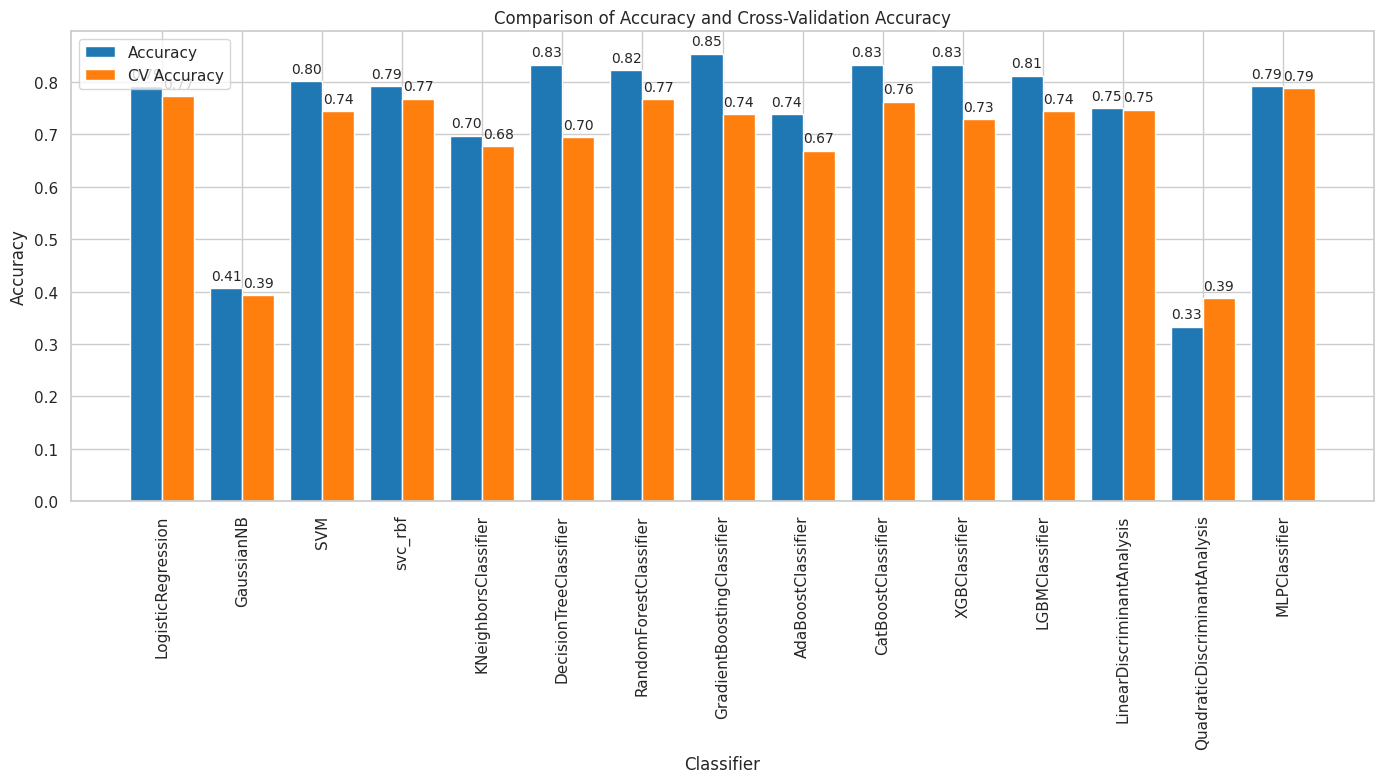

In [ ]:
# Plot comparative bar chart for Accuracy and Cross-Validation Accuracy
bar_width = 0.4
index = np.arange(len(classifiers))
classifier_names = [type(clf).__name__ if type(clf).__name__ != 'SVC' else 'svc_rbf' if clf == svc_rbf else 'SVM' for clf in classifiers]

plt.figure(figsize=(14, 8))
plt.bar(index, accuracy_list, bar_width, label='Accuracy', color='#1f77b4')
plt.bar(index + bar_width, cv_accuracy_list, bar_width, label='CV Accuracy', color='#ff7f0e')
for i in range(len(classifiers)):
    plt.text(index[i], accuracy_list[i] + 0.01, '{:.2f}'.format(accuracy_list[i]), ha='center', va='bottom', fontsize=10)
    plt.text(index[i] + bar_width, cv_accuracy_list[i] + 0.01, '{:.2f}'.format(cv_accuracy_list[i]), ha='center', va='bottom', fontsize=10)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy and Cross-Validation Accuracy')
plt.xticks(index + bar_width / 2, classifier_names, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


## 5.3 Recall and Precision Comparison

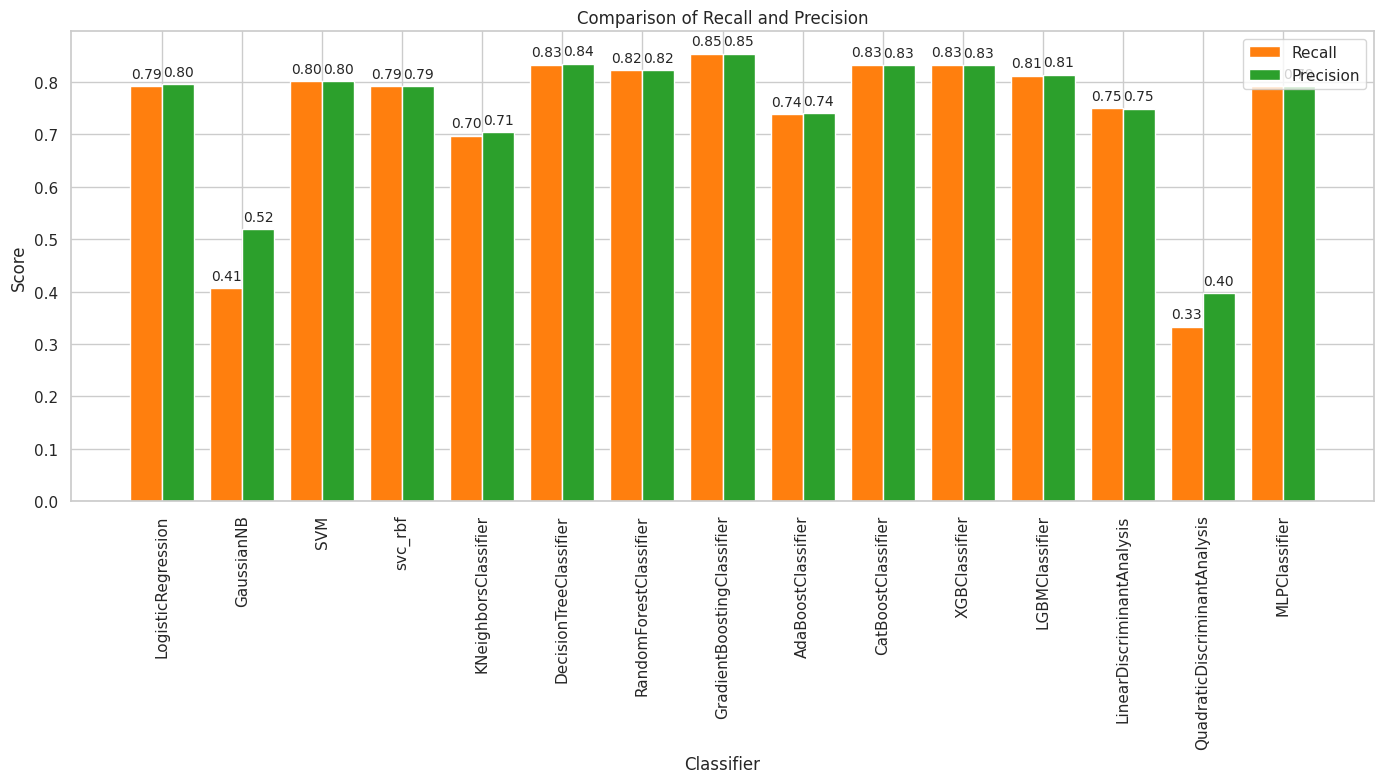

In [ ]:
# Plot comparative bar charts for Precision and Recall
plt.figure(figsize=(14, 8))
plt.bar(index, recall_list, bar_width, label='Recall', color='#ff7f0e')
plt.bar(index + bar_width, precision_list, bar_width, label='Precision', color='#2ca02c')
for i in range(len(classifiers)):
    plt.text(index[i], recall_list[i] + 0.01, '{:.2f}'.format(recall_list[i]), ha='center', va='bottom', fontsize=10)
    plt.text(index[i] + bar_width, precision_list[i] + 0.01, '{:.2f}'.format(precision_list[i]), ha='center', va='bottom', fontsize=10)
plt.xlabel('Classifier')
plt.ylabel('Score')
plt.title('Comparison of Recall and Precision')
plt.xticks(index + bar_width / 2, classifier_names, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


## 5.3  F1 Score Comparison

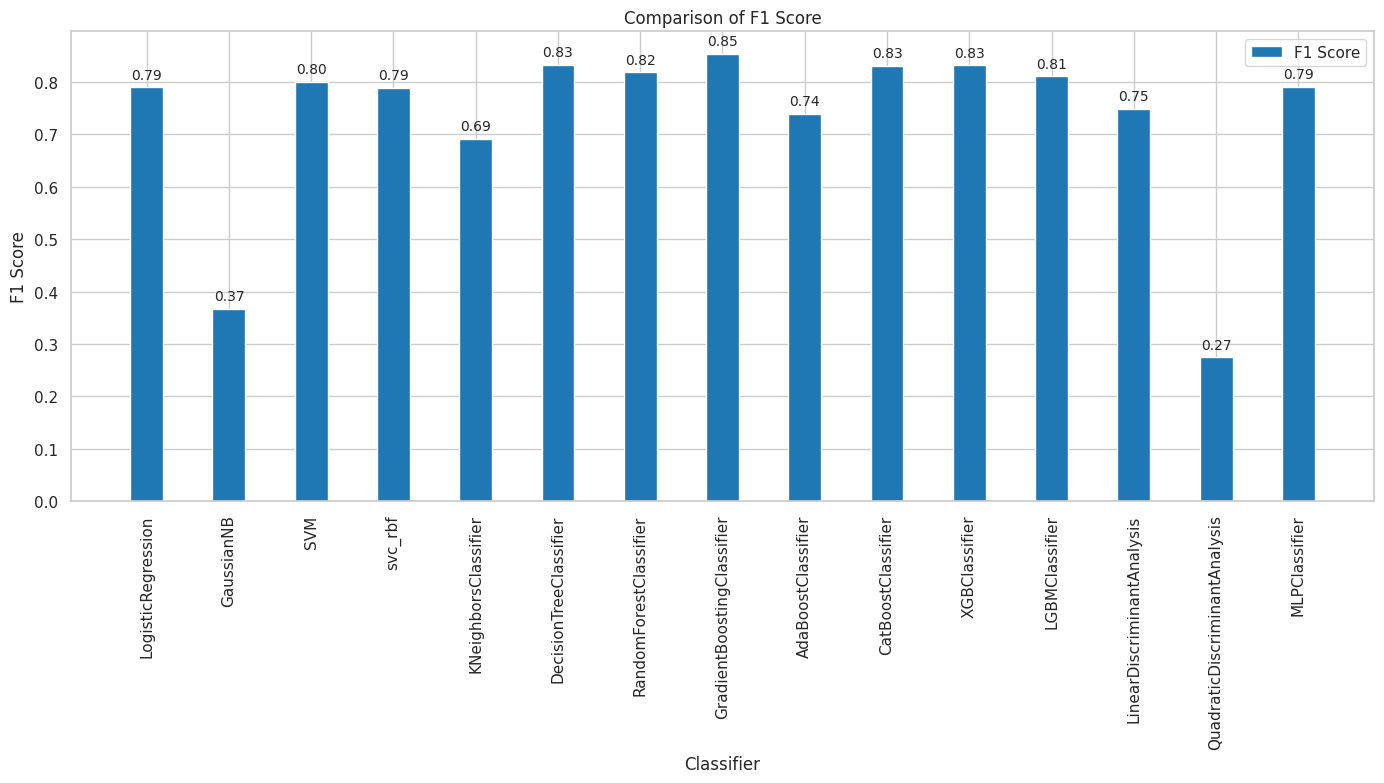

In [ ]:
# Plot comparative bar chart for F1 score
plt.figure(figsize=(14, 8))
plt.bar(index, f1_score_list, bar_width, label='F1 Score', color='#1f77b4')
for i in range(len(classifiers)):
    plt.text(index[i], f1_score_list[i] + 0.01, '{:.2f}'.format(f1_score_list[i]), ha='center', va='bottom', fontsize=10)
plt.xlabel('Classifier')
plt.ylabel('F1 Score')
plt.title('Comparison of F1 Score')
plt.xticks(index, classifier_names, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


## 5.4 MSE and RMSE Comparison

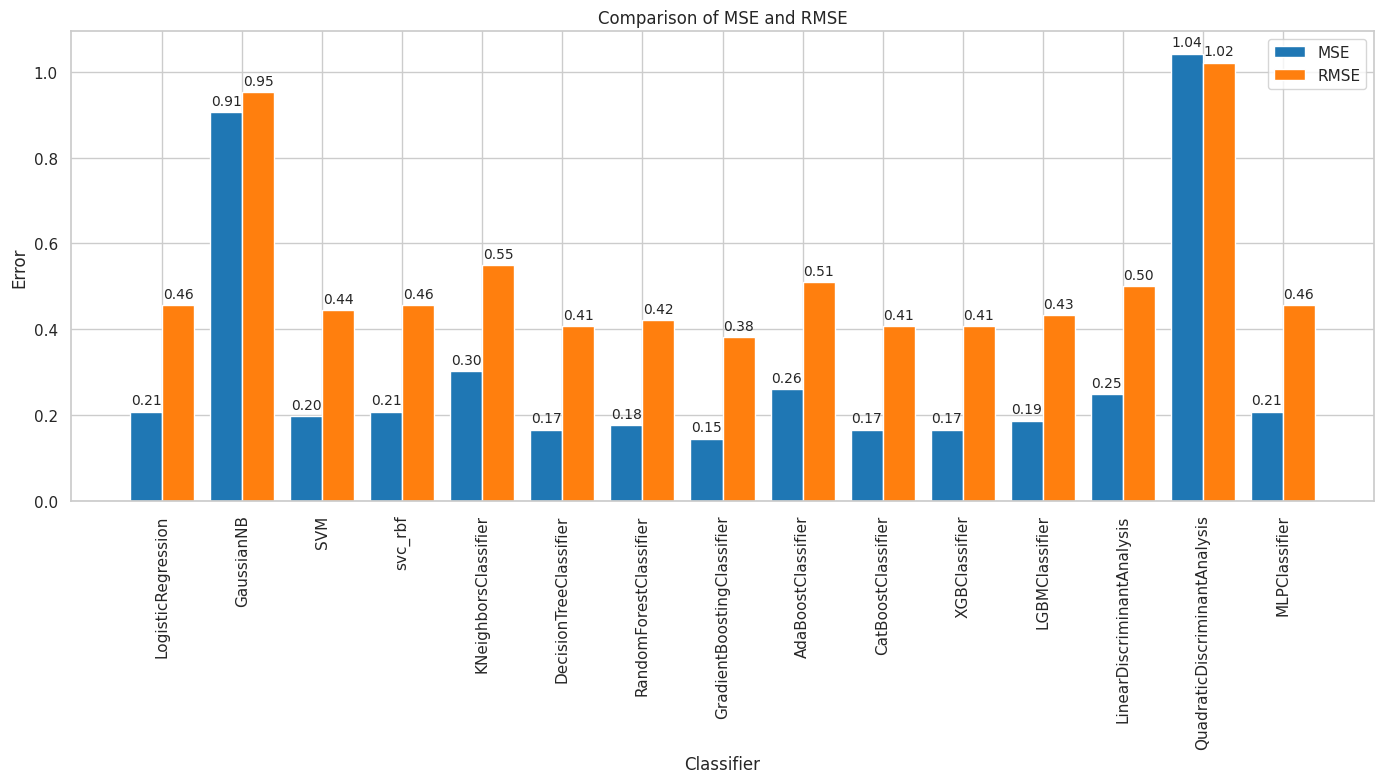

In [ ]:
# Plot comparative bar chart for MSE and RMSE
plt.figure(figsize=(14, 8))
plt.bar(index, mse_list, bar_width, label='MSE', color='#1f77b4')
plt.bar(index + bar_width, rmse_list, bar_width, label='RMSE', color='#ff7f0e')
for i in range(len(classifiers)):
    plt.text(index[i], mse_list[i] + 0.01, '{:.2f}'.format(mse_list[i]), ha='center', va='bottom', fontsize=10)
    plt.text(index[i] + bar_width, rmse_list[i] + 0.01, '{:.2f}'.format(rmse_list[i]), ha='center', va='bottom', fontsize=10)
plt.xlabel('Classifier')
plt.ylabel('Error')
plt.title('Comparison of MSE and RMSE')
plt.xticks(index + bar_width / 2, classifier_names, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


## 5.5 Combined ROC Curve for All Classifiers

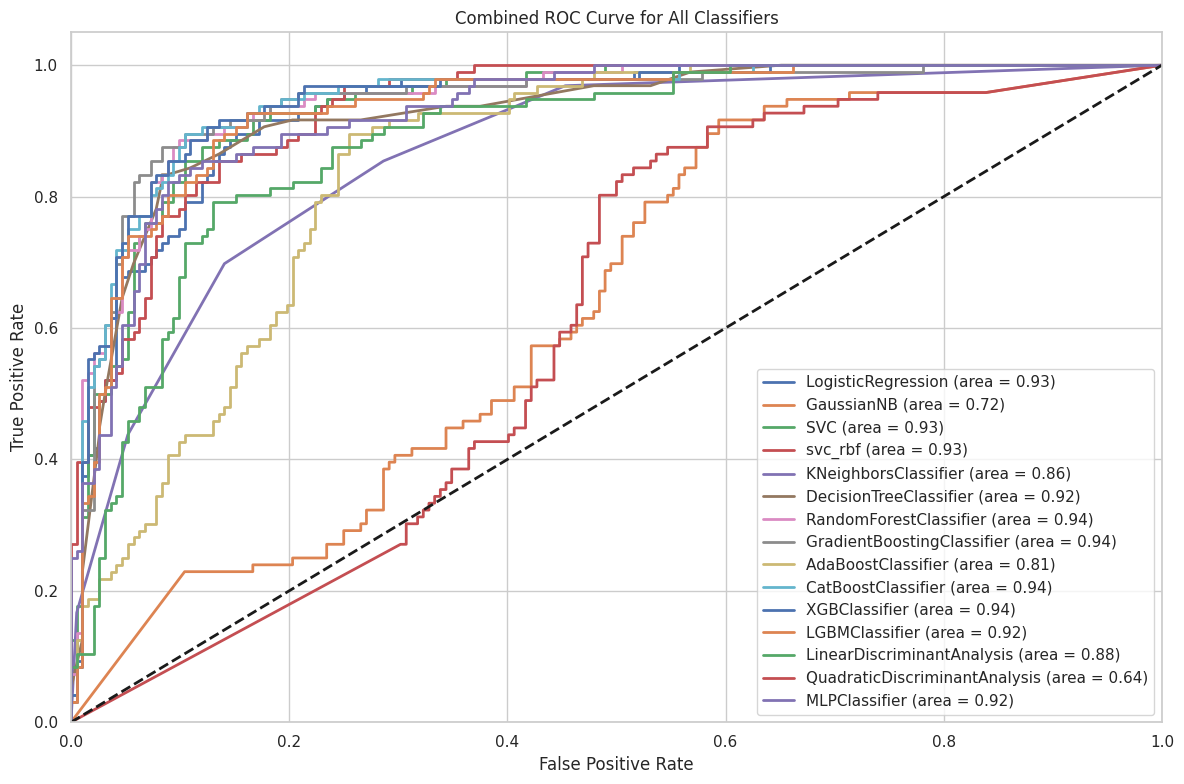

In [ ]:
# Plot combined ROC curve for all classifiers
plt.figure(figsize=(12, 8))
for classifier in classifiers:
    classifier.fit(x_train, y_train)
    if hasattr(classifier, "predict_proba"):
        y_prob = classifier.predict_proba(x_test)
    else:
        y_prob = classifier.decision_function(x_test)
        if y_prob.ndim == 1:
            y_prob = y_prob[:, np.newaxis]

    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())
    roc_auc = roc_auc_score(y_test_bin, y_prob)
    plt.plot(fpr, tpr, lw=2, label='{} (area = {:.2f})'.format('svc_rbf' if type(classifier).__name__ == 'SVC' and classifier == svc_rbf else type(classifier).__name__, roc_auc))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Combined ROC Curve for All Classifiers')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


## 5.6 ROC Curves for Each Classifier

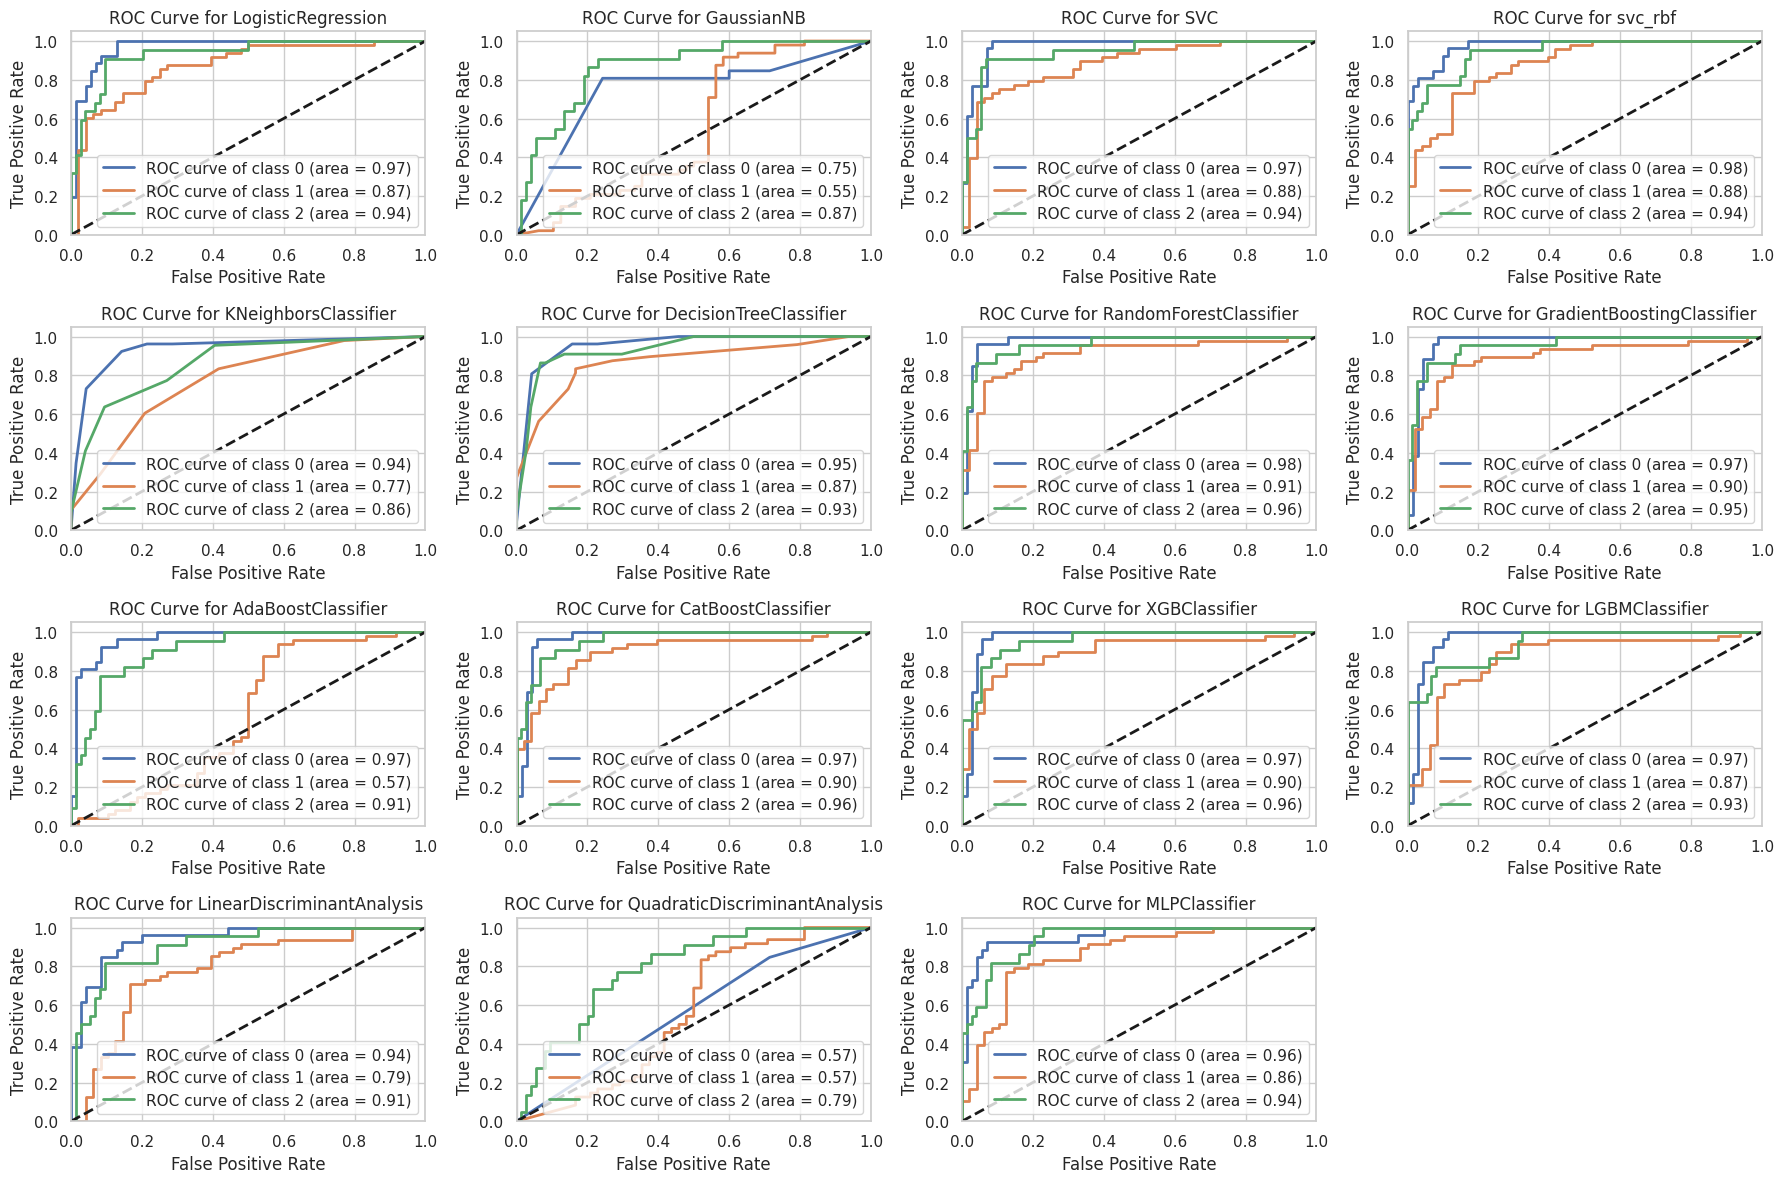

In [ ]:
# Plot ROC curves for each classifier
plt.figure(figsize=(18, 12))
for i, classifier in enumerate(classifiers, start=1):
    classifier.fit(x_train, y_train)
    if hasattr(classifier, "predict_proba"):
        y_prob = classifier.predict_proba(x_test)
    else:
        y_prob = classifier.decision_function(x_test)
        if y_prob.ndim == 1:
            y_prob = y_prob[:, np.newaxis]

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for j in range(n_classes):
        fpr[j], tpr[j], _ = roc_curve(y_test_bin[:, j], y_prob[:, j])
        roc_auc[j] = roc_auc_score(y_test_bin[:, j], y_prob[:, j])

    plt.subplot(4, 4, i)
    for j in range(n_classes):
        plt.plot(fpr[j], tpr[j], lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'.format(j, roc_auc[j]))
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    classifier_name = 'svc_rbf' if type(classifier).__name__ == 'SVC' and classifier == svc_rbf else type(classifier).__name__
    plt.title('ROC Curve for {}'.format(classifier_name))
    plt.legend(loc="lower right")
plt.tight_layout()
plt.show()
